In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('phone_data.csv')
df.head()
df.columns

Index(['Brand', 'Model', 'Release_Year', 'Screen_Size (inches)', 'Processor',
       'RAM (GB)', 'Storage (GB)', 'Rear_Camera (MP)', 'Front_Camera (MP)',
       'Battery (mAh)', 'Operating_System', 'Price (USD)', 'Weight (g)',
       'Dimensions (mm)', 'SIM_Card_Type', 'Connectivity', 'Color',
       'Water_Resistance', 'Rating'],
      dtype='object')

# Col value Encode

In [3]:
for col in df.columns:
    le= LabelEncoder()
    df[col]=le.fit_transform(df[col])
df.head()

Brand  Model  Release_Year  Screen_Size (inches)  Processor  RAM (GB)  \
0      3    120            12                     7          2         8   
1      0    116            10                    20          3         3   
2      4    286            13                    20          3         0   
3      5    267             5                    23          1        11   
4      3    324            12                    20          3        10   

   Storage (GB)  Rear_Camera (MP)  Front_Camera (MP)  Battery (mAh)  \
0           218                58                  5             92   
1            33                91                 11            122   
2           245                25                  0             76   
3           194                59                  0            324   
4           221                 8                 33            352   

   Operating_System  Price (USD)  Weight (g)  Dimensions (mm)  SIM_Card_Type  \
0                 0          102          10               26              2   
1                 1          377         361              315              1   
2                 1          348         295              150              2   
3                 1          136         337              177              2   
4                 1           64         281               43              1   

   Connectivity  Color  Water_Resistance  Rating  
0             3      0                 1       7  
1             3      4                 1      19  
2             2      2                 1      19  
3             1      3                 0      18  
4             1      2                 1       1

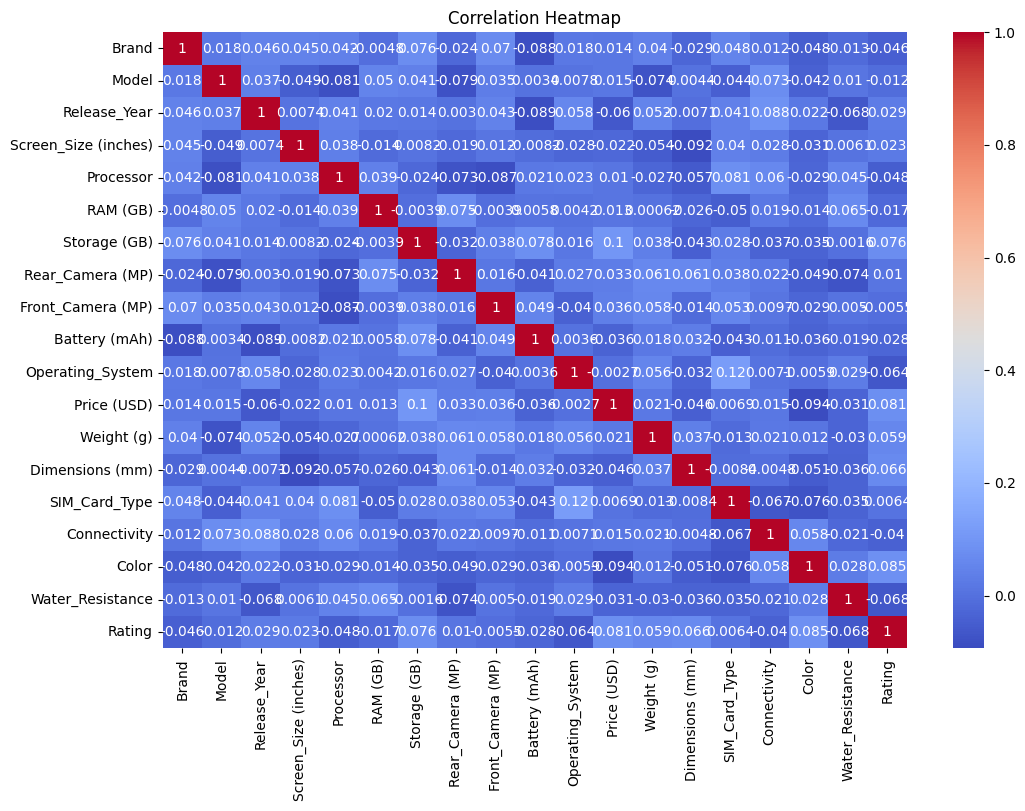

In [4]:

# Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Chi-Square Score**

In [5]:
x=df.drop(columns=['Processor'],axis=1)
y=df['Processor']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
k = 6
chi2_selector = SelectKBest(chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)

In [7]:
selected_feature_indices = chi2_selector.get_support(indices=True)
X_test_chi2 = X_test.iloc[:, selected_feature_indices]

# Selected Feature

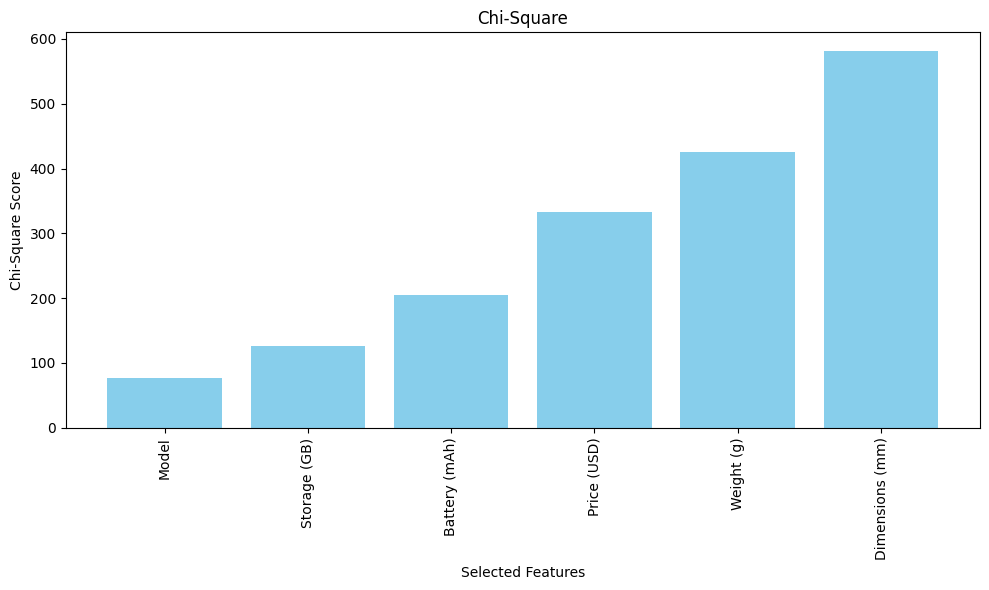

In [8]:

chi2_scores = chi2_selector.scores_[selected_feature_indices]


selected_feature_names = x.columns[selected_feature_indices]


sorted_indices = np.argsort(chi2_scores)
sorted_chi2_scores = chi2_scores[sorted_indices]


plt.figure(figsize=(10, 6))
plt.title("Chi-Square")
plt.bar(selected_feature_names,sorted_chi2_scores, color='skyblue')
plt.xlabel("Selected Features")
plt.ylabel("Chi-Square Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_chi2, y_train)

y_pred = svm_model.predict(X_test_chi2)

accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("SVM Model Accuracy:", accuracy)



SVM Model Accuracy: 0.2375


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


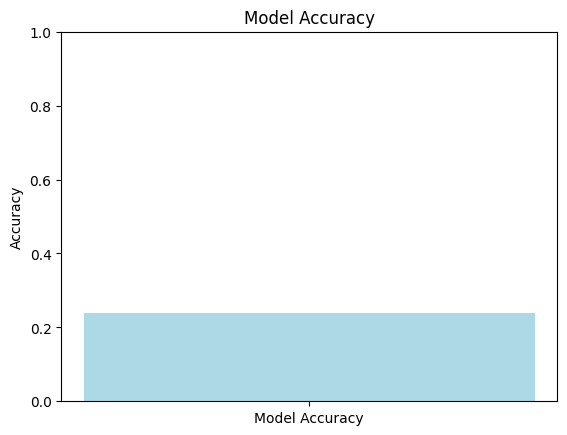

In [10]:

#Bar graph to visualize the accuracy
plt.bar(["Model Accuracy"], [accuracy], color=['lightblue'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  
plt.show()

In [11]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)

accuracy_scores = cross_val_score(clf, X_train_chi2, y_train, cv=5, scoring='accuracy')

# Print accuracy and from cross-validation
print("After Cross-Validation model Accuracy:", accuracy_scores.mean())


After Cross-Validation model Accuracy: 0.2625


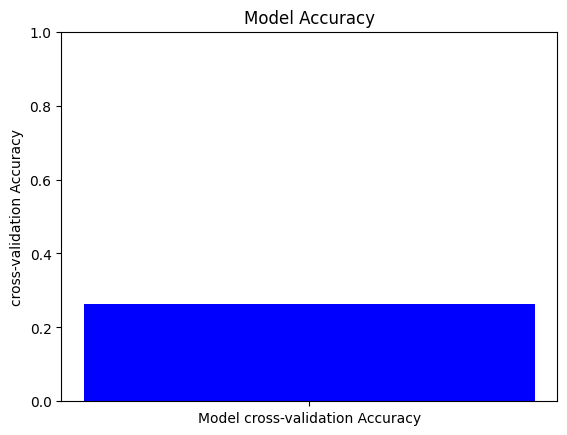

In [12]:
#Bar graph to visualize the cross-validation accuracy
plt.bar(["Model cross-validation Accuracy"], [accuracy_scores.mean()], color=['blue'])
plt.title("Model Accuracy")
plt.ylabel("cross-validation Accuracy")
plt.ylim(0, 1) 
plt.show()

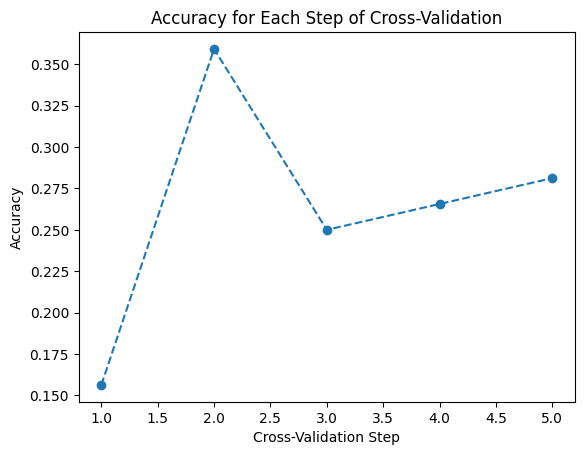

In [13]:

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Step of Cross-Validation')
plt.show()